In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#Libraries for preprocessing
from gensim.parsing.preprocessing import remove_stopwords
import string

#Libraries for vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer

#Libraries for clustering
from sklearn.cluster import KMeans


In [ ]:
# prepare data
df = pd.read_json('data_bukalapak.json')

text1 = df['name']

text2 = [remove_stopwords(x)\
        .translate(str.maketrans('','',string.punctuation))\
        .translate(str.maketrans('','',string.digits))\
        for x in text1]

text3 = []
for word in text2:
  words = word.lower()
  words = words.replace('  ', ' ')
  text3.append(words)
text3 = pd.Series(text3)

In [ ]:
# convert to vektor
vectorizer = TfidfVectorizer(stop_words={'word'})
X = vectorizer.fit_transform(text3)

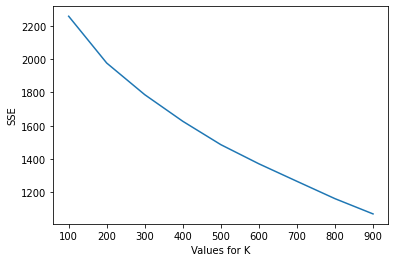

In [ ]:
# search the elbow for knowing the n_cluster
sse={}
for k in np.arange(100,1000,100):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.show();

In [ ]:
kmeans = KMeans(n_clusters=200)
kmeans.fit(X)
result = pd.concat([text1,pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())],axis=1)
result['cluster'] = kmeans.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(kmeans.inertia_)

1973.9130470908876


In [ ]:
result = result[['name', 'cluster']]
result.to_json('cluster_data_bukalapak.json')